<a href="https://colab.research.google.com/github/mrmm2703/first-cnn/blob/master/Intro%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Done with the help of [Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification)

# Importing the modules

First thing to do is to import the modules needed to build the image classification model.


*   TensorFlow (of course)
*   TensorFlow.keras for a high-level API to interact with TensorFlow (for models single inputs and outputs)
*   Numpy for the data structures
*   Matplotlib.Pyplot for visualising the data



In [ ]:
# Import TensorFlow and TensorFlow.keras
import tensorflow as tf
from tensorflow import keras

# Import numpy and matplotlib for visualiations and data manipulation
import numpy as np
import matplotlib.pyplot as plt

# Preparing the data

## Import the dataset

For this image classification model, we're going to be using the Fashion MNIST dataset which is included in the keras datasets. It has 60,000 training images and 10,000 testing images. Each image is a grayscale 28x28 image, with pixel values ranging from 0-255 to represent the colour.

The Fashion MNIST dataset can be directly imported from keras.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

Then we load the data from the dataset. This returns 4 arrays, which hold the training images and labels and the testing images and labels.



In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Now we have to make sure that the data labels are imported properly. Right now, the labels are an integer value which range from 0-9, so we can create a list of strings which correspond to the labels inside the dataset.

In [ ]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

## Explore the data

We can check the shape of the dataset to find out the number of training images and the sizes of them.

In [ ]:
train_images.shape

(60000, 28, 28)

This tells us there are 60,000 images, each of size 28x28 pixels. We can also use the len funcion to find out the length of the labels list.

In [ ]:
len(train_labels)

60000

We can also see that each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 28x28 images in the test dataset:

In [ ]:
test_images.shape

(10000, 28, 28)

And there are 10,000 image labels:

In [ ]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before it can be used for training a model. The model right now has pixel values from 0 to 255 as we can see by using pyplot to visualise the images.

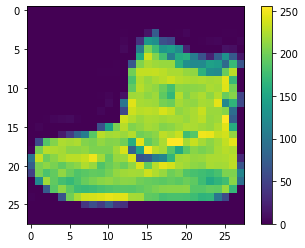

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We need to scale (or map) these values within a range of 0 to 1 to train our model. Our current values of 0 to 255 will not work. This needs to be done for both the training dataset and testing dataset.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Now let's check out some of the images we've preprocessed to double check that they are ready to be used in a training model. We're going to use a loop to display the first 25 images using pyplot.

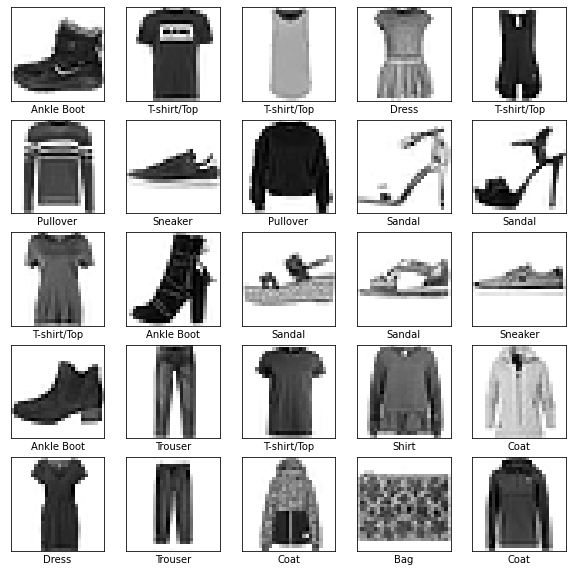

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

## Setting up the layers

We firstly need to make a neural network. The foundation of a neural network is the layer. These layers extract representations from the data fed into them. Here we are using [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), which groups a linear stack of layers (which we define below) into a [keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model) object.

Most deep learning usually consists of chaining together many simple layers. Most of these layers have parameters which are learnt during training.

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10)
])

Here we use two different [layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers). We use the `Flatten` and the `Dense` layers.


*   [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten): This layer transforms the image data from a two-dimensional array into a one-dimensional array. This is so we  get a single list of 784 values. There are no parameters to learn, because this first layer in the nueral network is responsible only for reformatting the data.
*   [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): This is a regular neural network layer. We use two of these layers in the neural network. These neural layers are densely connected, or fully connected, layers. The initial `Dense` layer has 128 nodes (or neurons). The second and final layer returns a logits array with a length of 10. Each node containes a score. This score indicates which one of the 10 classes the image belongs to.



## Compile the model

We need to add some more parameters to the model before the actual training itself. This is done during the compile step. We define the following parameters in the [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) function:

*   [`Loss`](https://www.tensorflow.org/api_docs/python/tf/keras/losses) function: This measures how accurate a model is. We want to minimise this function to help move the model in the right direction.
*   [`Optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers): This is how the model is updated based on the data it sees and the loss function.
*   [`Metrics`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics): This is a list of metrics/measurements the model uses to during the training and testing steps. Over here we use `accuracy`, which calculates how often the predictions equal the labels.



In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Train the model

There are 4 steps to completely training a neural network model:

1.   Feed the model the training data. For this project, we are going to feed the model the `train_images` and the `train_labels`
2.   The model learns to associate images with labels
3.   We ask the model to make predictions for us using the test data, `test_images`
4.   Verify hat the predictions made on the `test_images` match the labels in the `test_labels`



## Feed the model

To begin training the model, we need to call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) function. The loss and accuracy metrics will be displayed while the model trains itself. This particular model reaches an accuracy of 0.9098 (~91%) on the training data.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4989 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3806 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3418 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.8835
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2825 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

Here we provide the `fit` function 3 parameters.
*   `x`: The input data, which in this icase is the `train_images` array
*   `y`: The target data. Again, in this case we are using the `train_labels` array
*   `epochs`: This is the number of epochs to train the model with (the number of iterations over the dataset). In this case, we train the model for `10` epochs, so 10 iterations over the dataset provided.

## Evaluate accuracy

Now that the model has been trained, we need to test how the model performs against our test dateset. We do this with the [`model.evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) function.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy: " + str(test_acc))

313/313 - 0s - loss: 0.3517 - accuracy: 0.8789

Test accuracy: 0.8788999915122986


Here we provide the function with 3 parameters:
*   `x`: The input data to test, in this case the `test_images` array
*   `y`: The target data to test with, in this case the `test_labels` array
*   `verbose`: The verbosity mode. `0` will be show nothing (silent). `1` will show you an animated progress bar. `2` will mention the number of epochs.

Let's have a look at the accuracy of the data. The accuracy of the evauluate function was `0.8720999956130981` and the accuracy of the fit function when training the model was `0.9098`. Because the accuracy of the evalutation of accuracy was less than the actual accurarcy on the training dataset, the gap between the accuracies shows *overfitting*. This is when a model performs worse on new, unseen inputs than it does on the training data. An overfitted model "memorises" the noise and details in the training dataset to an extent which impacts the performance of the model on the new data. 

## Make predictions

Now that we have a trained model, we can use this model to make some predictions about some images. The model's linear ouputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Logits is the vector of raw (non-normalised) predictions that a classification model generates. This is ordinarily passed onto a normalisation function. In this case we have a multi-class classifcation modelproble, in which the logits usually become an input to the [softmax](https://developers.google.com/machine-learning/glossary#softmax) function. This generate a vector of (normalised) probabilities with one value for each possible class. This makes the output easier to interpet in multi-class classification models such as this one.

Let's begin by creating a model for the probability:

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

Now let's store all the predictions that model creates in an array:

In [ ]:
predictions = probability_model.predict(test_images)

Now we can have a look at the individual predictions for each class for each test data image. Let's take a look at the predictions for the first image in the dataset:

In [ ]:
predictions[0]

array([9.3403252e-10, 1.7215708e-08, 3.4993448e-09, 3.4397495e-08,
       5.1338750e-10, 1.6741414e-02, 3.2600286e-07, 2.9792327e-02,
       2.1773863e-08, 9.5346588e-01], dtype=float32)

A single element from the predictions list is an array of 10 prediction values for each of the 10 classes. They show the "confidence" level of the model for each of the classes. Using numpy, we can see which label has the highest confidence level:

In [ ]:
np.argmax(predictions[0])

9

This means that the model is confident that this image is the 9th class, which is an ankle boot. We can check this against the known value for this image by having a look at the `test_labels` list at the same index.

In [ ]:
test_labels[0]

9

As we can see, the model has correctly identified that the image is of class 9, which is an ankle boot. 

## Verify predictions

Let's start by creating a couple of functions which uses pyplot to show the plot the images and their labels.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("green")

Now let's begin creating some predictions based on our test data. We will use the previous two functions we defined with pyplot for this.

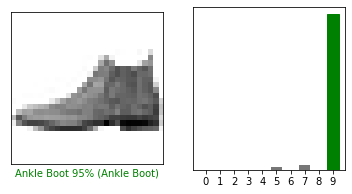

In [ ]:
i = 0

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

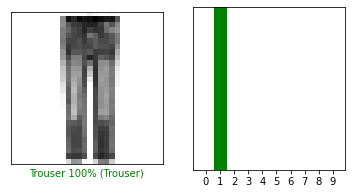

In [ ]:
i = 15

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

Now let's plot several of these images with their predictions. 

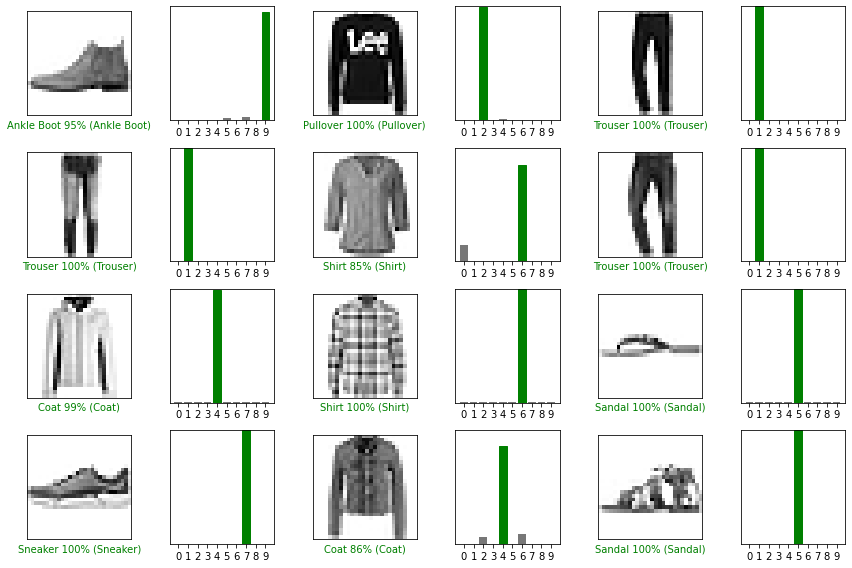

In [ ]:
num_rows = 4
num_cols = 3
num_img = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_img):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the model

Now that we've completely trained the model, we can test individual images to make predictions about a single image. Let's grab an image from the test dataset.

In [ ]:
img = test_images[1]
print(img.shape)

(28, 28)


`tf.keras` models were made to make batch predictions and therefore take in a list of input data rather to predict on rather than a single one. Therefore we need to put our single image inside a list by itself.

In [ ]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


Now let's make a prediction about the label of this image.

In [ ]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[5.9581151e-05 1.0553704e-12 9.9613178e-01 1.0308122e-13 3.6891161e-03
  1.1542909e-11 1.1963673e-04 5.0652720e-19 2.6786464e-11 2.0821547e-13]]


Now let's plot this data using pyplot and attach our labels to them too.

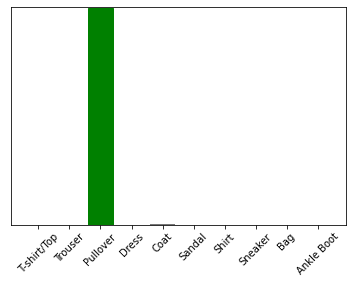

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

We can also use the `np.argmax` function to get the largest value inside the first index of our array.

In [ ]:
np.argmax(predictions_single[0])

2

This verifies that our model predicted the correct label based on this single image.